In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.patches as patches

In [2]:
df1 = pd.read_csv("file1.csv")
df2 = pd.read_csv("file2.csv")

In [3]:
k1 = list(df1)
k2 = list(df2)
k = [x for x in k1 if x in k2]
k

['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name']

Analysing the difference between the columns Group_Name and Sub_Group_Name 

In [4]:
print(df1["Group_Name"].unique())
print(df1["Sub_Group_Name"].unique())

['Rape' 'Kidnapping & Abduction - Women & Girls' 'Dowry Deaths'
 'Molestation' 'Sexual harassment' 'Cruelty by Husband and Relatives'
 'Importation of Girls' 'Immoral Traffic (Prevention) Act'
 'Indecent Representation of Women (Prohibition) Act'
 'Sati Prevention Act' 'Total Crime Against Women']
['01. Rape' '02. Kidnapping & Abduction of Women & Girls'
 '03. Dowry Deaths' '04. Molestation' '05. Sexual Harassment'
 '06. Cruelty by Husband and Relatives' '07. Importation of Girls'
 '08. Immoral Traffic Prevention Act' '09. Dowry Prohibition Act'
 '10. Indecent Representation of Women(Prohibition) Act'
 '11. Sati Prevention Act' '12. Total Crimes Against Women']


On Analysing dataset1 we observed that Group_Name gives 11 values where as Sub_Group_Name gives 12. This was due to an error in the dataset where Importation of Girls was added as the Group_Name for the Sub_Group_Name Dowry Prohibition Act 
On Analysing dataset2 there was no such error found. 
To prevent any discrepency in the merged data it was decideded to drop the Group_Name column in both datasets.  

In [5]:
df1 = df1.drop(["Group_Name"], axis=1)
df2 = df2.drop(["Group_Name"], axis=1)

However it was observed that, 
Dataset 1 - Sub_Group_Name = 09. Dowry Prohibition Act
Dataset 2 - Sub_Group_Name = 09. Dowry Prohibition
To avoid any loss of data due to this all such values in Dataset 2 are replaced with 09. Dowry Prohibition Act 

In [6]:
df2 = df2.replace(to_replace="09. Dowry Prohibition", value="09. Dowry Prohibition Act")

Merging the 2 files 

In [7]:
k1 = list(df1)
k2 = list(df2)
k = [x for x in k1 if x in k2]
k

['Area_Name', 'Year', 'Sub_Group_Name']

In [8]:
df = pd.merge(df1, df2, on=k)


In [9]:
cond = df[(df['Sub_Group_Name'] == "08. Immoral Traffic Prevention Act") | (df['Sub_Group_Name']== "09. Dowry Prohibition Act") | (df['Sub_Group_Name'] == "10. Indecent Representation of Women(Prohibition) Act") | (df['Sub_Group_Name'] == "11. Sati Prevention Act")].index
df.drop(cond , inplace=True)
df["Sub_Group_Name"].unique()

array(['01. Rape', '02. Kidnapping & Abduction of Women & Girls',
       '03. Dowry Deaths', '04. Molestation', '05. Sexual Harassment',
       '06. Cruelty by Husband and Relatives', '07. Importation of Girls',
       '12. Total Crimes Against Women'], dtype=object)

In [10]:
df.to_csv('Crime_Against_Women.csv')

In [11]:
df.shape

(2765, 33)

In [12]:
total_df = df[df['Sub_Group_Name']=='12. Total Crimes Against Women']
#total_df.groupby(['Area_Name','Year']).first()
total_df

,Area_Name,Year,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
3850,Andaman & Nicobar Islands,2001,12. Total Crimes Against Women,14,6,40,0,0,0,46,...,34,49,0,33,18,204,0,16,171,220
3851,Andhra Pradesh,2001,12. Total Crimes Against Women,6773,236,13848,1849,4765,2067,14084,...,22218,19991,4142,5485,6862,29935,850,15104,27636,47627
3852,Arunachal Pradesh,2001,12. Total Crimes Against Women,12,22,138,7,36,0,160,...,218,169,40,70,70,854,49,55,749,918
3853,Assam,2001,12. Total Crimes Against Women,1289,1031,2115,154,302,322,3146,...,5497,3120,410,3930,4700,10002,1607,2269,9385,12505
3854,Bihar,2001,12. Total Crimes Against Women,1760,627,4307,196,768,401,4934,...,13034,10975,1495,5878,6319,39450,1618,6547,35633,46608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,Tamil Nadu,2010,12. Total Crimes Against Women,2823,565,4780,13,1749,708,5345,...,9649,8841,2809,3407,4038,21259,177,8392,20814,29655
4161,Tripura,2010,12. Total Crimes Against Women,683,102,1360,74,95,15,1462,...,2127,1611,144,408,584,2183,340,1467,2193,3804
4162,Uttar Pradesh,2010,12. Total Crimes Against Women,6976,3746,14401,366,10307,1704,18147,...,58330,41235,27706,6897,7934,116367,16058,48532,125133,166368
4163,Uttarakhand,2010,12. Total Crimes Against Women,308,185,864,17,499,47,1049,...,1750,1683,1075,241,231,5764,77,2127,6286,7969


In [13]:
df = df[df['Sub_Group_Name']!='12. Total Crimes Against Women']
df["Sub_Group_Name"].unique()

array(['01. Rape', '02. Kidnapping & Abduction of Women & Girls',
       '03. Dowry Deaths', '04. Molestation', '05. Sexual Harassment',
       '06. Cruelty by Husband and Relatives', '07. Importation of Girls'],
      dtype=object)

In [14]:
zero= dict()
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    zero[column_name] = ((count/df.shape[0])*100).round(3)
zero

{'Area_Name': 0.0,
 'Year': 0.0,
 'Sub_Group_Name': 0.0,
 'Cases_Acquitted_or_Discharged': 28.204,
 'Cases_charge_sheets_were_not_laid_but_Final_Report_submitted': 35.469,
 'Cases_Chargesheeted': 22.408,
 'Cases_Compounded_or_Withdrawn': 56.367,
 'Cases_Convicted': 33.551,
 'Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law': 48.408,
 'Cases_Investigated_Chargesheets+FR_Submitted': 20.898,
 'Cases_not_Investigated_or_in_which_investigation_was_refused': 85.837,
 'Cases_Pending_Investigation_at_Year_End': 23.102,
 'Cases_Pending_Investigation_from_previous_year': 23.878,
 'Cases_Pending_Trial_at_Year_End': 17.959,
 'Cases_Pending_Trial_from_the_previous_year': 18.49,
 'Cases_Reported': 20.408,
 'Cases_Sent_for_Trial': 22.408,
 'Cases_Trials_Completed': 25.184,
 'Cases_Withdrawn_by_the_Govt': 97.551,
 'Cases_withdrawn_by_the_Govt_during_investigation': 96.898,
 'Total_Cases_for_Trial': 16.286,
 'Persons_Acquitted': 27.959,
 'Persons_against_whom_cases_Compounded_or_Withdrawn':

In [15]:
sorted_value_index = np.argsort(zero.values())
dictionary_keys = list(zero.keys())
zero = {dictionary_keys[i]: sorted(
    zero.values())[i] for i in range(len(dictionary_keys))}
print(zero)

{'Area_Name': 0.0, 'Year': 0.0, 'Sub_Group_Name': 0.0, 'Cases_Acquitted_or_Discharged': 16.286, 'Cases_charge_sheets_were_not_laid_but_Final_Report_submitted': 17.469, 'Cases_Chargesheeted': 17.959, 'Cases_Compounded_or_Withdrawn': 18.49, 'Cases_Convicted': 19.102, 'Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law': 19.592, 'Cases_Investigated_Chargesheets+FR_Submitted': 20.408, 'Cases_not_Investigated_or_in_which_investigation_was_refused': 20.898, 'Cases_Pending_Investigation_at_Year_End': 21.796, 'Cases_Pending_Investigation_from_previous_year': 22.408, 'Cases_Pending_Trial_at_Year_End': 22.408, 'Cases_Pending_Trial_from_the_previous_year': 22.653, 'Cases_Reported': 23.102, 'Cases_Sent_for_Trial': 23.878, 'Cases_Trials_Completed': 25.184, 'Cases_Withdrawn_by_the_Govt': 25.51, 'Cases_withdrawn_by_the_Govt_during_investigation': 27.673, 'Total_Cases_for_Trial': 27.959, 'Persons_Acquitted': 28.163, 'Persons_against_whom_cases_Compounded_or_Withdrawn': 28.204, 'Persons_Arres

In [16]:
for key,value in zero.items():
  if (value>=50):
    print(key,value)
    del df[key]

Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end 52.857
Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End 56.367
Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason 56.939
Persons_Trial_Completed 85.837
Persons_under_Trial_at_Year_beginning 96.898
Total_Persons_under_Trial 97.551


## Exploratory Data Analysis

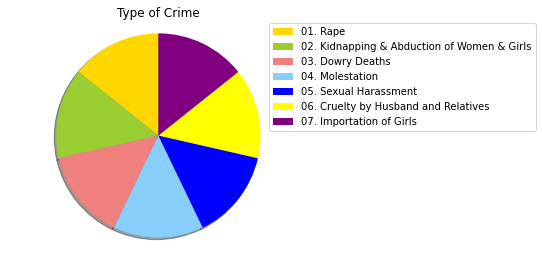

In [17]:
# Data to plot
labels = df["Sub_Group_Name"].unique()
sizes = df['Sub_Group_Name'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','yellow','purple', 'red','pink','grey','orange','darkblue']

plt.title('Type of Crime')

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels,   bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.75)
plt.axis('equal')
plt.show()

No bias in data. All type of Crime are equally represented for the respective States.

['01. Rape' '02. Kidnapping & Abduction of Women & Girls'
 '03. Dowry Deaths' '04. Molestation' '05. Sexual Harassment'
 '06. Cruelty by Husband and Relatives' '07. Importation of Girls']
                                             Cases_Acquitted_or_Discharged  \
Sub_Group_Name                                                               
01. Rape                                                            100941   
02. Kidnapping & Abduction of Women & Girls                          58648   
03. Dowry Deaths                                                     37249   
04. Molestation                                                     143444   
05. Sexual Harassment                                                34353   
06. Cruelty by Husband and Relatives                                244110   
07. Importation of Girls                                               234   

                                             Cases_Convicted  
Sub_Group_Name                                

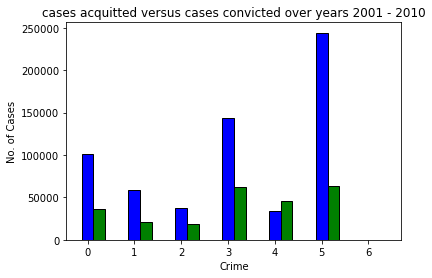

In [18]:
#Bar graph for cases acquitted versus cases convicted over years 2001 - 2010
xlabels = df["Sub_Group_Name"].unique()
print(df["Sub_Group_Name"].unique())

x1=df.groupby(["Sub_Group_Name"]).agg({'Cases_Acquitted_or_Discharged':'sum','Cases_Convicted':'sum'})
print(x1.head(50))
n=len(df["Sub_Group_Name"].unique())
r = np.arange(n)
width = 0.25
plt.bar(r,x1['Cases_Acquitted_or_Discharged'],color = 'b',width = width, edgecolor = 'black')
plt.bar(r + width, x1['Cases_Convicted'], color = 'g',width = width, edgecolor = 'black')
plt.xlabel("Crime")
plt.ylabel("No. of Cases")
plt.title("cases acquitted versus cases convicted over years 2001 - 2010")
plt.show()


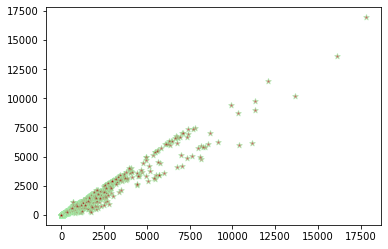

In [19]:
plt.scatter(df['Cases_Reported'], df['Cases_Sent_for_Trial'], 
            color = '#A90303', marker = '*',alpha = 0.6,
             edgecolors = '#A4F5AF')



### FINDING CORRELATION 

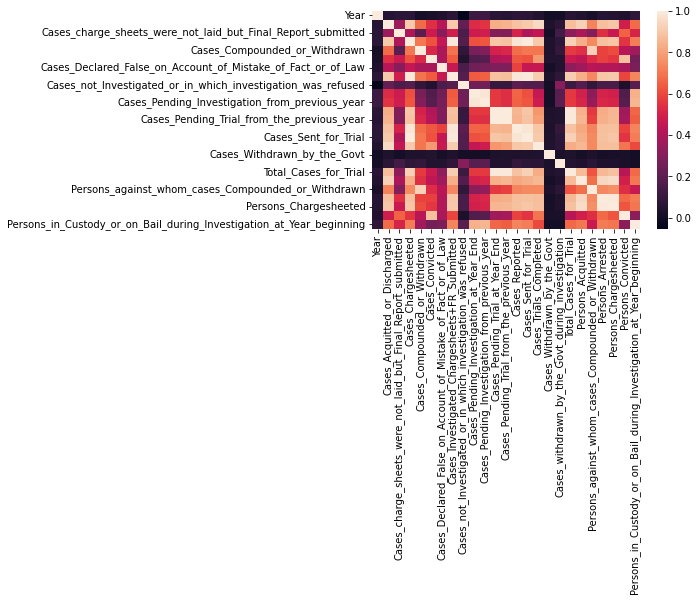

In [20]:
sns.heatmap(df.corr(method='pearson'))
plt.savefig('heatmap.png')

In [21]:
#describe() funtion gives us the summary statistics of the dataframe
df.describe()

,Year,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,Cases_not_Investigated_or_in_which_investigation_was_refused,Cases_Pending_Investigation_at_Year_End,...,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,...,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,2005.500000,252.644490,40.437143,527.591020,54.545306,100.617551,61.798367,568.028163,1.062041,221.587347,...,353.262041,0.402857,0.278367,2440.475918,520.448980,98.006531,1081.744898,1008.696735,189.949388,231.892653
std,2.872868,534.023365,127.779987,1215.994292,242.164162,266.706351,247.936275,1273.335949,4.965482,586.690003,...,714.861052,8.120051,2.954684,6074.949556,1380.104545,417.943070,2894.465173,2706.244943,625.592904,656.112955
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,2005.500000,17.000000,4.000000,45.000000,0.000000,8.000000,1.000000,53.500000,0.000000,21.000000,...,29.000000,0.000000,0.000000,207.000000,32.000000,0.000000,76.000000,64.500000,11.000000,13.000000
75%,2008.000000,286.000000,24.000000,507.750000,8.000000,75.000000,25.000000,581.750000,0.000000,150.750000,...,385.000000,0.000000,0.000000,2170.000000,505.000000,14.000000,943.000000,871.750000,129.000000,140.000000
max,2010.000000,5343.000000,1816.000000,16946.000000,3400.000000,3024.000000,4755.000000,17407.000000,68.000000,8934.000000,...,6099.000000,306.000000,72.000000,81124.000000,18221.000000,6870.000000,31807.000000,28238.000000,11741.000000,7616.000000


In [22]:
#correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
#plt.savefig('result.png')

,Year,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,Cases_not_Investigated_or_in_which_investigation_was_refused,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning
Year,1.000000,0.051175,0.065387,0.063883,0.013517,0.018565,0.037017,0.067567,-0.052211,0.119919,0.113152,0.064432,0.061149,0.073535,0.063883,0.045156,-0.002844,0.007697,0.062826,0.044959,0.021470,0.052100,0.047841,0.034348,0.076741
Cases_Acquitted_or_Discharged,0.051175,1.000000,0.365965,0.907581,0.674491,0.543130,0.425656,0.903435,0.211061,0.530440,0.549789,0.832655,0.847275,0.886647,0.907581,0.949666,0.031573,0.067327,0.874901,0.925491,0.728593,0.880285,0.896258,0.489603,0.671222
Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,0.065387,0.365965,1.000000,0.406792,0.191582,0.472752,0.306675,0.488824,0.156291,0.477436,0.485151,0.292972,0.291106,0.502715,0.406792,0.449765,0.002184,0.135211,0.319618,0.388108,0.294330,0.536021,0.466379,0.652536,0.510677
Cases_Chargesheeted,0.063883,0.907581,0.406792,1.000000,0.702284,0.618188,0.454488,0.995789,0.174109,0.614974,0.626288,0.894387,0.886829,0.979532,1.000000,0.908630,0.031259,0.071187,0.925765,0.838302,0.742083,0.881364,0.896084,0.550037,0.715242
Cases_Compounded_or_Withdrawn,0.013517,0.674491,0.191582,0.702284,1.000000,0.520899,0.389797,0.689883,0.082295,0.268957,0.295132,0.500393,0.518136,0.677760,0.702284,0.698207,0.033750,0.087857,0.564489,0.540488,0.928256,0.587815,0.607461,0.424827,0.370560
Cases_Convicted,0.018565,0.543130,0.472752,0.618188,0.520899,1.000000,0.395323,0.637790,0.040669,0.168441,0.183856,0.404708,0.423573,0.631964,0.618188,0.778823,0.042951,0.045894,0.470268,0.441919,0.534484,0.580229,0.559565,0.883729,0.260428
Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,0.037017,0.425656,0.306675,0.454488,0.389797,0.395323,1.000000,0.464796,0.153311,0.249003,0.265055,0.286856,0.284758,0.587047,0.454488,0.465468,0.010206,0.045150,0.323960,0.364473,0.431090,0.409985,0.410075,0.385779,0.276927
Cases_Investigated_Chargesheets+FR_Submitted,0.067567,0.903435,0.488824,0.995789,0.689883,0.637790,0.464796,1.000000,0.181952,0.635192,0.646770,0.883510,0.876105,0.985869,0.995789,0.912846,0.030070,0.081550,0.916149,0.839498,0.738201,0.895464,0.902532,0.590750,0.734279
Cases_not_Investigated_or_in_which_investigation_was_refused,-0.052211,0.211061,0.156291,0.174109,0.082295,0.040669,0.153311,0.181952,1.000000,0.246104,0.248418,0.103376,0.097996,0.200871,0.174109,0.172842,0.004778,0.308728,0.115029,0.174960,0.084204,0.153061,0.153229,0.025716,0.190679
Cases_Pending_Investigation_at_Year_End,0.119919,0.530440,0.477436,0.614974,0.268957,0.168441,0.249003,0.635192,0.246104,1.000000,0.981443,0.563157,0.537274,0.655111,0.614974,0.459099,0.006188,0.193608,0.562709,0.495984,0.318207,0.506331,0.494198,0.167090,0.842208


In [23]:
strong_corr = df.corr().round(6).unstack()
strong_corr = strong_corr[abs(strong_corr) >= 0.9]
strong_corr = strong_corr.sort_values(ascending=False)
strong_df= strong_corr.to_frame().reset_index()
strong_df

,level_0,level_1,0
0,Year,Year,1.000000
1,Cases_Investigated_Chargesheets+FR_Submitted,Cases_Investigated_Chargesheets+FR_Submitted,1.000000
2,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_at_Year_End,1.000000
3,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Investigation_from_previous_year,1.000000
4,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_at_Year_End,1.000000
...,...,...,...
72,Cases_Chargesheeted,Cases_Acquitted_or_Discharged,0.907581
73,Cases_Investigated_Chargesheets+FR_Submitted,Cases_Acquitted_or_Discharged,0.903435
74,Cases_Acquitted_or_Discharged,Cases_Investigated_Chargesheets+FR_Submitted,0.903435
75,Persons_Chargesheeted,Cases_Investigated_Chargesheets+FR_Submitted,0.902532


In [24]:
strong_df = strong_df[strong_df.level_0!=strong_df.level_1]
m = pd.DataFrame(np.sort(strong_df[['level_0','level_1']], axis=1), index=strong_df.index).duplicated()
strong_df = strong_df[~m]
strong_df = strong_df.reset_index(drop=True)
strong_df

,level_0,level_1,0
0,Cases_Sent_for_Trial,Cases_Chargesheeted,1.000000
1,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,0.997452
2,Cases_Chargesheeted,Cases_Investigated_Chargesheets+FR_Submitted,0.995789
3,Cases_Investigated_Chargesheets+FR_Submitted,Cases_Sent_for_Trial,0.995789
4,Total_Cases_for_Trial,Cases_Pending_Trial_from_the_previous_year,0.995713
5,Total_Cases_for_Trial,Cases_Pending_Trial_at_Year_End,0.995146
6,Persons_Arrested,Persons_Chargesheeted,0.993084
7,Cases_Reported,Cases_Investigated_Chargesheets+FR_Submitted,0.985869
8,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Investigation_at_Year_End,0.981443
9,Cases_Sent_for_Trial,Cases_Reported,0.979532


<AxesSubplot:xlabel='Total_Cases_for_Trial'>

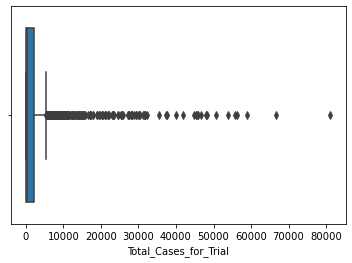

In [25]:
#Outlier Analysis
sns.boxplot(x=df['Total_Cases_for_Trial'])

Since the total cases for trial are outliers, we have to drop those set of rpws which are a cumulation of all the cases for trial.

In [26]:
# # Scatter plot
# fig, ax = plt.subplots(figsize = (5,5))
# ax.scatter(df['Total_Persons_under_Trial'],df['Persons_Trial_Completed'])
 
# # x-axis label
# ax.set_xlabel('Total Persons under trial')
 
# # y-axis label
# ax.set_ylabel('Persons whose trial is completed')
# plt.show()

In [27]:
# fig, ax = plt.subplots(figsize = (5,5))
# ax.scatter(df['Cases_Trials_Completed'],df['Total_Cases_for_Trial'])
 
# # x-axis label
# ax.set_xlabel('Total cases for trial')
 
# # y-axis label
# ax.set_ylabel('Cases completed')
# plt.show()

In [28]:
# #z-score
# from scipy import stats
 
# z = np.abs(stats.zscore(df['Cases_Acquitted_or_Discharged']))
# print(z)

In [29]:
# sns.regplot(x=df["Cases_Trials_Completed"], y=df["Total_Cases_for_Trial"])

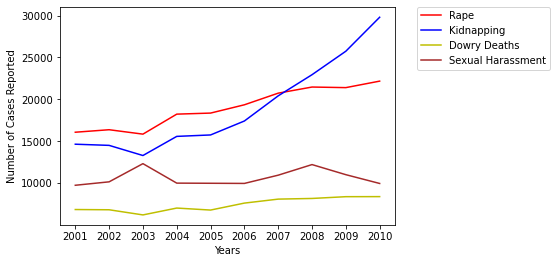

In [30]:
x=df.groupby(["Sub_Group_Name","Year"]).agg({'Cases_Reported':'sum'}).reset_index()
xlbs = list(df["Year"].unique())
#print(xlbs)

xgraph=x.loc[x['Sub_Group_Name'] == "01. Rape"]
xgraph2=x.loc[x['Sub_Group_Name'] == "02. Kidnapping & Abduction of Women & Girls"]
xgraph3=x.loc[x['Sub_Group_Name'] == "03. Dowry Deaths"]
xgraph4=x.loc[x['Sub_Group_Name'] == "04. Molestation"]
xgraph5=x.loc[x['Sub_Group_Name'] == "05. Sexual Harassment"]
xgraph6=x.loc[x['Sub_Group_Name'] == "06. Cruelty by Husband and Relatives"]
xgraph7=x.loc[x['Sub_Group_Name'] == "07. Importation of Girls"]

crimes = df["Sub_Group_Name"].unique()
#print(xgraph["Cases_Reported"])
r=np.arange(10) 
plt.plot(r, xgraph["Cases_Reported"], color='r')
plt.plot(r, xgraph2["Cases_Reported"], color='b')
plt.plot(r, xgraph3["Cases_Reported"], color='y')
plt.plot(r, xgraph5["Cases_Reported"], color='brown')

plt.xlabel("Years")
plt.ylabel("Number of Cases Reported")
plt.gca().legend(('Rape','Kidnapping','Dowry Deaths','Sexual Harassment','Cruelty'),bbox_to_anchor=(1.05,1.025), loc="upper left")
plt.xticks(np.arange(10), xlbs)  

plt.show()

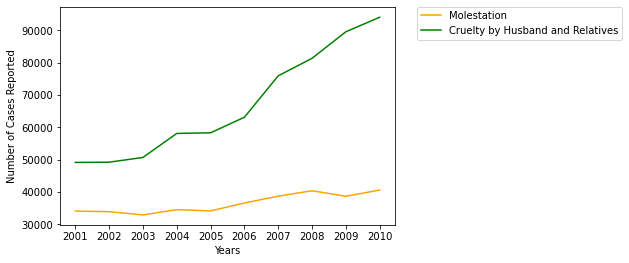

In [31]:
plt.plot(r, xgraph4["Cases_Reported"], color='orange')
plt.plot(r, xgraph6["Cases_Reported"], color='green')
plt.xticks(np.arange(10), xlbs) 
plt.gca().legend(('Molestation','Cruelty by Husband and Relatives'),bbox_to_anchor=(1.05,1.025), loc="upper left")
plt.xlabel("Years")
plt.ylabel("Number of Cases Reported")
plt.show()

In [32]:
crime = list(df["Sub_Group_Name"].unique())[0:]
crime

['01. Rape',
 '02. Kidnapping & Abduction of Women & Girls',
 '03. Dowry Deaths',
 '04. Molestation',
 '05. Sexual Harassment',
 '06. Cruelty by Husband and Relatives',
 '07. Importation of Girls']

In [33]:
g= pd.DataFrame(df.groupby(['Sub_Group_Name'])['Cases_Reported'].sum().reset_index())
g = g.sort_values("Cases_Reported",ascending = False)
g

,Sub_Group_Name,Cases_Reported
5,06. Cruelty by Husband and Relatives,669539
3,04. Molestation,364836
1,02. Kidnapping & Abduction of Women & Girls,190080
0,01. Rape,190008
4,05. Sexual Harassment,106311
2,03. Dowry Deaths,74351
6,07. Importation of Girls,753


In [34]:
fig= px.bar(g,x=df['Sub_Group_Name'],y=df['Cases_Reported'],color_discrete_sequence=['blue'])
fig.show()

In [35]:
g= pd.DataFrame(df.groupby(['Year'])['Cases_Reported'].sum().reset_index())
g = g.sort_values("Cases_Reported",ascending = False)
g

,Year,Cases_Reported
9,2010,205009
8,2009,194835
7,2008,186616
6,2007,174921
5,2006,154158
3,2004,143615
4,2005,143523
2,2003,131364
1,2002,131112
0,2001,130725


In [36]:
fig= px.bar(g,x='Year',y='Cases_Reported',color_discrete_sequence=['blue'])
fig.show()

In [37]:
for i in crime:
  df_i = df[df['Sub_Group_Name']==i]
  gi= pd.DataFrame(df_i.groupby(['Area_Name'])['Cases_Reported'].sum().reset_index())
  gi =gi.sort_values("Cases_Reported",ascending = False)
  print(i)
  fig= px.bar(gi,x='Area_Name',y='Cases_Reported',color_discrete_sequence=['blue'])
  fig.show()

01. Rape


02. Kidnapping & Abduction of Women & Girls


03. Dowry Deaths


04. Molestation


05. Sexual Harassment


06. Cruelty by Husband and Relatives


07. Importation of Girls


## Models to predict Cases Reported

(Based on year, state, crime type)

## 1. MLR  with dummy variables


In [38]:
df_en = df.copy(deep=True)
df_en

,Area_Name,Year,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning
0,Andaman & Nicobar Islands,2001,01. Rape,5,2,3,0,0,0,5,...,5,0,0,39,6,0,3,3,0,6
1,Andhra Pradesh,2001,01. Rape,731,22,769,35,197,74,791,...,928,2,0,2937,1168,13,1150,1021,246,450
2,Arunachal Pradesh,2001,01. Rape,1,2,25,0,2,0,27,...,3,0,0,285,1,0,51,31,2,25
3,Assam,2001,01. Rape,334,95,495,10,101,45,590,...,435,0,0,2409,403,14,928,585,120,806
4,Bihar,2001,01. Rape,406,141,685,0,155,105,826,...,561,0,0,3746,756,0,1400,1302,217,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Tamil Nadu,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,Tripura,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,Uttar Pradesh,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2448,Uttarakhand,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_en['Area_Name']= label_encoder.fit_transform(df_en['Area_Name'])
df_en['Sub_Group_Name']= label_encoder.fit_transform(df_en['Sub_Group_Name'])
df_en

,Area_Name,Year,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning
0,0,2001,0,5,2,3,0,0,0,5,...,5,0,0,39,6,0,3,3,0,6
1,1,2001,0,731,22,769,35,197,74,791,...,928,2,0,2937,1168,13,1150,1021,246,450
2,2,2001,0,1,2,25,0,2,0,27,...,3,0,0,285,1,0,51,31,2,25
3,3,2001,0,334,95,495,10,101,45,590,...,435,0,0,2409,403,14,928,585,120,806
4,4,2001,0,406,141,685,0,155,105,826,...,561,0,0,3746,756,0,1400,1302,217,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,30,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,31,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,32,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2448,33,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#TRAINING DATA USING MLR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_df, test = train_test_split(df_en, test_size=0.3, random_state=42, shuffle=True)
train_df

,Area_Name,Year,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning
519,29,2005,1,0,0,2,0,0,0,2,...,0,0,0,5,0,0,3,1,0,0
308,28,2009,0,385,13,967,14,221,518,980,...,606,0,0,3150,545,23,1388,1387,296,12
2032,2,2009,5,3,0,14,0,3,0,14,...,6,0,0,87,4,0,12,14,3,4
2108,8,2001,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,33,2005,2,29,14,48,0,14,2,62,...,43,0,0,248,84,0,160,135,43,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,28,2007,4,7,0,19,2,14,7,19,...,21,3,0,124,15,6,34,34,15,0
1095,10,2002,3,7,1,14,2,6,0,15,...,13,0,0,57,16,3,24,21,7,5
1130,10,2003,3,10,3,11,3,2,0,14,...,12,0,0,53,13,3,15,13,3,7
1294,34,2007,3,611,92,1585,6,87,2,1677,...,698,0,0,9098,804,31,1712,1839,87,1161


In [41]:
X_test = test[["Year","Area_Name","Sub_Group_Name","Cases_Sent_for_Trial"]]
y_test=test[["Cases_Reported"]]
x_train= train_df[["Year","Area_Name","Sub_Group_Name","Cases_Sent_for_Trial"]]
X_test = test[["Year","Area_Name","Sub_Group_Name","Cases_Sent_for_Trial"]]
y_train = train_df['Cases_Reported']

regr = linear_model.LinearRegression()
model = regr.fit(x_train,y_train)
r_sq = model.score(x_train, y_train)
r_sq

y_pred = model.predict(X_test)
y_pred
mse = mean_squared_error(y_test,y_pred)
mse**0.5

307.39245304801824

In [42]:
# x= train_df[["Year","Area_Name","Sub_Group_Name","Cases_Sent_for_Trial"]]
# y = train_df['Cases_Reported']

# regr = linear_model.LinearRegression()
# model = regr.fit(x,y)
# r_sq = model.score(x, y)
# r_sq

# y_pred = model.predict(x)
# y_pred
# mse = mean_squared_error(y,y_pred)
# mse**0.5

In [43]:
mx=df["Cases_Reported"].max()
#print(mx)
mn=df['Cases_Reported'].min()
#print(mn)
normalised_rmse=(mse**0.5)/(mx-mn)
print("Normalised RMSE for MLR: ",normalised_rmse)

Normalised RMSE for MLR:  0.01727312053540224


In [44]:
y_test = np.array(y_test)

c:\Users\tanvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Errors')

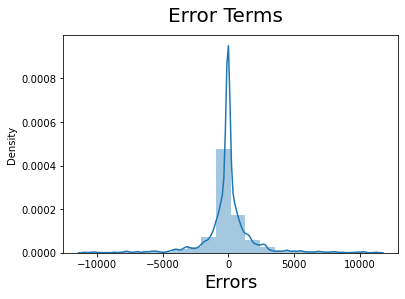

In [45]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

The Multiple Regression model above uses the year, area, type of crime and the cases that are sent for trial to perform the prdictions for the number of cases reported. We decided to try this model due to the high correlation between the repective features found in the EDA performed above

## 2. RANDOM FOREST 1
### Label Encoder Version to predict Cases Reported

In [46]:
#CREATING DUMMY VARIABLES
X = df.iloc[:, :].values
print(X)

[['Andaman & Nicobar Islands' 2001 '01. Rape' ... 3 0 6]
 ['Andhra Pradesh' 2001 '01. Rape' ... 1021 246 450]
 ['Arunachal Pradesh' 2001 '01. Rape' ... 31 2 25]
 ...
 ['Uttar Pradesh' 2010 '07. Importation of Girls' ... 0 0 0]
 ['Uttarakhand' 2010 '07. Importation of Girls' ... 0 0 0]
 ['West Bengal' 2010 '07. Importation of Girls' ... 8 0 4]]


In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
#encoding Area_Name 
X[:,0] = labelencoder_X.fit_transform(X[:,0])
#encoding Sub_Group_Name
X[:,2] = labelencoder_X.fit_transform(X[:,2])
print(X)

[[0 2001 0 ... 3 0 6]
 [1 2001 0 ... 1021 246 450]
 [2 2001 0 ... 31 2 25]
 ...
 [32 2010 6 ... 0 0 0]
 [33 2010 6 ... 0 0 0]
 [34 2010 6 ... 8 0 4]]


In [48]:
#NEW DF WITH ONLY 4 REQUIRED COLUMNS
df_Lencoded=pd.DataFrame(X,columns=df.columns)
df_Lencoded

,Area_Name,Year,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning
0,0,2001,0,5,2,3,0,0,0,5,...,5,0,0,39,6,0,3,3,0,6
1,1,2001,0,731,22,769,35,197,74,791,...,928,2,0,2937,1168,13,1150,1021,246,450
2,2,2001,0,1,2,25,0,2,0,27,...,3,0,0,285,1,0,51,31,2,25
3,3,2001,0,334,95,495,10,101,45,590,...,435,0,0,2409,403,14,928,585,120,806
4,4,2001,0,406,141,685,0,155,105,826,...,561,0,0,3746,756,0,1400,1302,217,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,30,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,31,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,32,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2448,33,2010,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_rf = df_Lencoded[["Area_Name","Year","Sub_Group_Name","Cases_Reported"]]

In [50]:
# Labels are the values we want to predict
labels = np.array(df_rf['Cases_Reported'])
# Remove the labels from the features
# axis 1 refers to the columns
df_rf_train= df_rf.drop('Cases_Reported', axis = 1)
# Saving feature names for later use
df_list = list(df_rf.columns)

In [51]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_rf_train, labels, test_size = 0.1, random_state = 42)

In [52]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2205, 3)
Training Labels Shape: (2205,)
Testing Features Shape: (245, 3)
Testing Labels Shape: (245,)


In [53]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [54]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [55]:
np.set_printoptions(suppress=True,formatter={'float_kind':'{:.2f}'.format})
predictions

array([1367.18, 115.80, 0.06, 641.93, 579.28, 0.83, 20.12, 10612.15,
       1811.40, 58.21, 9.59, 30.32, 3.12, 1332.32, 383.45, 740.26,
       2249.51, 935.29, 1.46, 201.49, 1894.00, 1058.20, 1795.70, 930.02,
       0.45, 1090.83, 1525.75, 1442.74, 44.06, 40.74, 50.06, 36.03,
       727.91, 27.87, 0.14, 3508.13, 0.09, 672.95, 40.86, 549.76, 0.13,
       4.35, 1036.55, 4.56, 789.68, 19.16, 146.57, 181.28, 6611.21,
       598.00, 0.00, 56.44, 440.74, 0.06, 1629.45, 223.04, 454.78, 883.22,
       1256.71, 40.42, 983.38, 0.01, 81.90, 34.77, 307.64, 44.03, 2317.19,
       933.21, 22.62, 352.80, 61.35, 0.04, 349.48, 8.51, 117.21, 1754.54,
       0.00, 1386.03, 21.78, 150.40, 0.12, 2589.77, 80.91, 925.40,
       1556.74, 0.71, 4821.55, 1.59, 46.73, 42.43, 931.97, 7.41, 818.42,
       424.52, 0.03, 238.40, 781.57, 6.20, 35.91, 0.44, 601.18, 53.42,
       29.62, 833.12, 1958.95, 34.59, 543.36, 6.48, 0.01, 135.21, 22.52,
       39.87, 17.26, 282.56, 1584.47, 639.50, 2726.13, 864.54, 970.15,
    

In [56]:
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 86.8


MAPE (Mean Absolute Percentage Error) cannot be calculated as values in the dataset are 0 and hence, MAPE will give "division by zero" error.

In [57]:
from sklearn.metrics import mean_squared_error
MSE_error_rf1 = mean_squared_error(test_labels, predictions)
print('Root Mean Squared Error:',round((MSE_error_rf1**.5),2))

Root Mean Squared Error: 199.3


In [58]:
mx=df["Cases_Reported"].max()
#print(mx)
mn=df['Cases_Reported'].min()
#print(mn)
normalised_rmse=(MSE_error_rf1**0.5)/(mx-mn)
print("Normalised RMSE for Random Forest 1: ",normalised_rmse)

Normalised RMSE for Random Forest 1:  0.011199276745165933


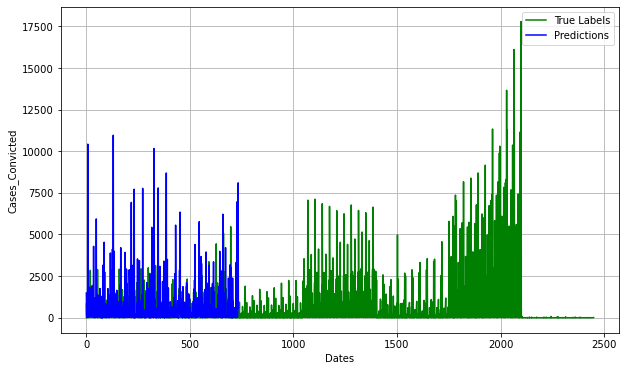

In [59]:
train_data = df_Lencoded['Cases_Reported']
test = y_pred
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Cases_Convicted')
plt.plot(train_data, 'green', label='True Labels')
plt.plot(test, 'blue', label='Predictions')
plt.legend()

RMSE tends to penalise the larger error to a greate magnitude 

## 3. RANDOM FOREST 2
### One-Hot Encoding Version to predict Cases Reported

In [60]:
df_one = df.copy(deep=True)
df_one = df_one[["Area_Name","Year","Sub_Group_Name","Cases_Reported"]]
df_one

,Area_Name,Year,Sub_Group_Name,Cases_Reported
0,Andaman & Nicobar Islands,2001,01. Rape,3
1,Andhra Pradesh,2001,01. Rape,871
2,Arunachal Pradesh,2001,01. Rape,33
3,Assam,2001,01. Rape,817
4,Bihar,2001,01. Rape,888
...,...,...,...,...
2445,Tamil Nadu,2010,07. Importation of Girls,0
2446,Tripura,2010,07. Importation of Girls,0
2447,Uttar Pradesh,2010,07. Importation of Girls,0
2448,Uttarakhand,2010,07. Importation of Girls,0


In [61]:
y = df_one.pop('Cases_Reported')
X = df_one.copy(deep=True)
X

,Area_Name,Year,Sub_Group_Name
0,Andaman & Nicobar Islands,2001,01. Rape
1,Andhra Pradesh,2001,01. Rape
2,Arunachal Pradesh,2001,01. Rape
3,Assam,2001,01. Rape
4,Bihar,2001,01. Rape
...,...,...,...
2445,Tamil Nadu,2010,07. Importation of Girls
2446,Tripura,2010,07. Importation of Girls
2447,Uttar Pradesh,2010,07. Importation of Girls
2448,Uttarakhand,2010,07. Importation of Girls


In [62]:
seed = 50  # so that the result is reproducible
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.1, random_state = seed)

In [63]:
train_features.dtypes

Area_Name         object
Year               int64
Sub_Group_Name    object
dtype: object

In [64]:
features_to_encode = list(train_features.select_dtypes(include = ['object']).columns) 
# # Or alternatively, 
# features_to_encode = X_train.columns[X_train.dtypes==object].tolist()

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')

In [67]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(train_features, train_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Area_Name',
                                                   'Sub_Group_Name'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=50, n_estimators=150,
                                        n_jobs=-1, oob_score=True,
                                        random_state=50))])

In [68]:
y_pred = pipe.predict(test_features)

In [69]:
MSE_error_rf2 = mean_squared_error(test_labels, predictions)
print('Root Mean Squared Error:',round((MSE_error_rf2**.5),2))

Root Mean Squared Error: 1865.43


In [70]:
mx=df["Cases_Reported"].max()
#print(mx)
mn=df['Cases_Reported'].min()
#print(mn)
normalised_rmse=(MSE_error_rf2**0.5)/(mx-mn)
print("Normalised RMSE for Random Forest 2 (One hot encoding): ",normalised_rmse)

Normalised RMSE for Random Forest 2 (One hot encoding):  0.10482295935943073


## 4. SARIMAX

In [71]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.arima_model 
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

In [72]:
dfs = df.copy(deep=True)
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dfs['Area_Name']= label_encoder.fit_transform(dfs['Area_Name'])
dfs['Sub_Group_Name']= label_encoder.fit_transform(dfs['Sub_Group_Name'])
dfs.columns

Index(['Area_Name', 'Year', 'Sub_Group_Name', 'Cases_Acquitted_or_Discharged',
       'Cases_charge_sheets_were_not_laid_but_Final_Report_submitted',
       'Cases_Chargesheeted', 'Cases_Compounded_or_Withdrawn',
       'Cases_Convicted',
       'Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law',
       'Cases_Investigated_Chargesheets+FR_Submitted',
       'Cases_not_Investigated_or_in_which_investigation_was_refused',
       'Cases_Pending_Investigation_at_Year_End',
       'Cases_Pending_Investigation_from_previous_year',
       'Cases_Pending_Trial_at_Year_End',
       'Cases_Pending_Trial_from_the_previous_year', 'Cases_Reported',
       'Cases_Sent_for_Trial', 'Cases_Trials_Completed',
       'Cases_Withdrawn_by_the_Govt',
       'Cases_withdrawn_by_the_Govt_during_investigation',
       'Total_Cases_for_Trial', 'Persons_Acquitted',
       'Persons_against_whom_cases_Compounded_or_Withdrawn',
       'Persons_Arrested', 'Persons_Chargesheeted', 'Persons_Convicted',
   

In [73]:
dfs= dfs[["Year","Area_Name","Sub_Group_Name","Cases_Sent_for_Trial","Cases_Reported"]]
df

,Area_Name,Year,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning
0,Andaman & Nicobar Islands,2001,01. Rape,5,2,3,0,0,0,5,...,5,0,0,39,6,0,3,3,0,6
1,Andhra Pradesh,2001,01. Rape,731,22,769,35,197,74,791,...,928,2,0,2937,1168,13,1150,1021,246,450
2,Arunachal Pradesh,2001,01. Rape,1,2,25,0,2,0,27,...,3,0,0,285,1,0,51,31,2,25
3,Assam,2001,01. Rape,334,95,495,10,101,45,590,...,435,0,0,2409,403,14,928,585,120,806
4,Bihar,2001,01. Rape,406,141,685,0,155,105,826,...,561,0,0,3746,756,0,1400,1302,217,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,Tamil Nadu,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,Tripura,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,Uttar Pradesh,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2448,Uttarakhand,2010,07. Importation of Girls,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


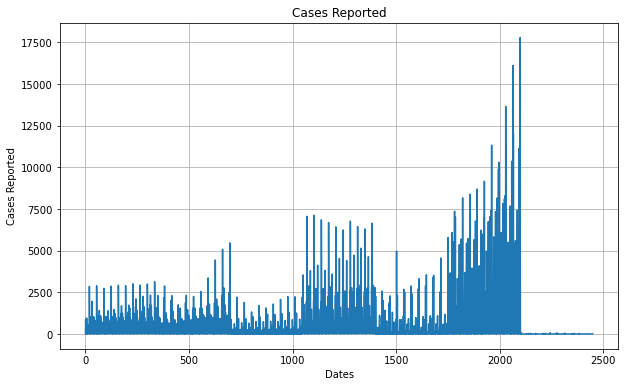

In [74]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Cases Reported')
plt.plot(dfs['Cases_Reported'])
plt.title('Cases Reported')
plt.show()

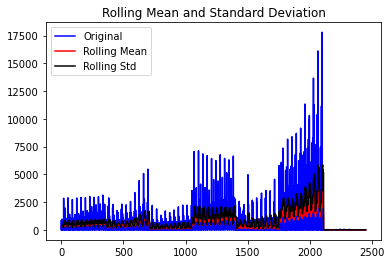

Results of Dickey Fuller test
Test Statistics                  -3.850455
p-value                           0.002431
No. of lags used                 27.000000
Number of observations used    2422.000000
critical value (1%)              -3.433053
critical value (5%)              -2.862734
critical value (10%)             -2.567406
dtype: float64


In [75]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of Dickey Fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(dfs['Cases_Reported'])

<Figure size 432x288 with 0 Axes>

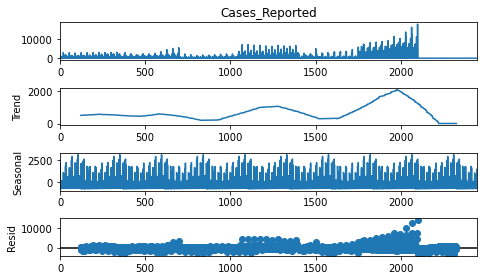

In [76]:
result = seasonal_decompose(dfs['Cases_Reported'], model='additive',period=245)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(7, 4)

In [77]:
X_train, y_test = train_test_split(dfs, test_size=0.3, random_state=42)
X_train

,Year,Area_Name,Sub_Group_Name,Cases_Sent_for_Trial,Cases_Reported
519,2005,29,1,2,2
308,2009,28,0,967,1519
2032,2009,2,5,14,13
2108,2001,8,6,0,0
873,2005,33,2,48,63
...,...,...,...,...,...
1638,2007,28,4,19,28
1095,2002,10,3,14,18
1130,2003,10,3,11,19
1294,2007,34,3,1585,2281


In [78]:
df3 = X_train[["Area_Name","Sub_Group_Name","Year","Cases_Sent_for_Trial"]]
model_autoARIMA = auto_arima(X_train["Cases_Reported"], start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,
                      exogenous= df3)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24242.010, Time=3.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=24241.553, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=24241.505, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=24243.395, Time=0.95 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=24243.371, Time=0.95 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=24245.362, Time=1.96 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24243.504, Time=1.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 9.183 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1715
Model:               SARIMAX(0, 0, 1)   Log Likelihood              -12114.752
Date:                Fri, 11 Nov 2022   AIC                          24241.505
Time:                        18:46:44   BIC                          24274.188
Sample:         

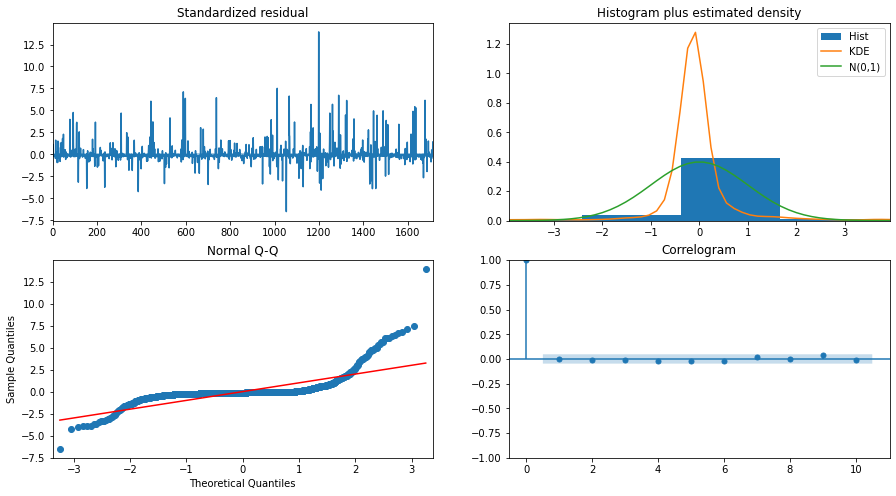

In [79]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(X_train['Cases_Reported'], 
exog=df3,
order=(0,0,1),
enforce_invertibility=False, enforce_stationarity=False)

c:\Users\tanvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\tanvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [81]:
df_test3 = y_test[["Area_Name","Sub_Group_Name","Year","Cases_Sent_for_Trial"]]
results= model.fit()
forecast_1= results.forecast(steps=len(y_test), exog=df_test3)

c:\Users\tanvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [82]:
print(forecast_1)

1715    1469.964884
1716     203.346624
1717      11.319082
1718     449.425946
1719     435.504445
           ...     
2445     149.213600
2446    1215.084337
2447     876.332255
2448    8107.875989
2449     585.985792
Name: predicted_mean, Length: 735, dtype: float64


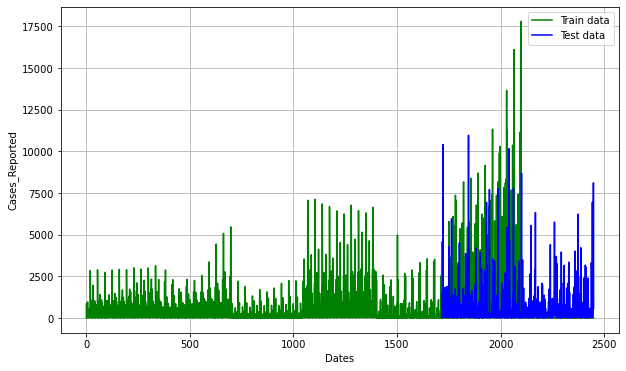

In [83]:
train_data = df['Cases_Reported']
test = forecast_1
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Cases_Reported')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

In [84]:
MSE_error_sarima = mean_squared_error(y_test['Cases_Reported'], forecast_1)
print('Root Mean Squared Error:',round((MSE_error_sarima**.5),2))

Root Mean Squared Error: 307.77


In [85]:
mx=df["Cases_Reported"].max()
#print(mx)
mn=df['Cases_Reported'].min()
#print(mn)
normalised_rmse=(MSE_error_sarima**0.5)/(mx-mn)
print("Normalised RMSE for Sarima : ",normalised_rmse)

Normalised RMSE for Sarima :  0.017294541940498103


## Models to predict Cases Convicted
STATE-WISE, YEAR-WISE, CRIME-WISE, USING CASES REPORTED

## 1. ARIMA

In [86]:
df1=df.groupby(['Area_Name', 'Year'],as_index=False)['Cases_Convicted','Persons_Convicted','Cases_Trials_Completed'].sum()
df_temp=df[(df["Area_Name"]=="West Bengal") & (df["Year"]==2006)]
df_temp["Cases_Convicted"].sum()
df1
df1.columns
df2=df1[(df1["Area_Name"]=="West Bengal")]
df2

C:\Users\tanvi\AppData\Local\Temp\ipykernel_18200\1149494317.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Area_Name,Year,Cases_Convicted,Persons_Convicted,Cases_Trials_Completed
340,West Bengal,2001,282,544,2439
341,West Bengal,2002,795,1150,4981
342,West Bengal,2003,362,668,3865
343,West Bengal,2004,365,663,2756
344,West Bengal,2005,758,1127,4403
345,West Bengal,2006,919,1982,6435
346,West Bengal,2007,444,635,4854
347,West Bengal,2008,526,627,5057
348,West Bengal,2009,440,608,4773
349,West Bengal,2010,417,579,4451


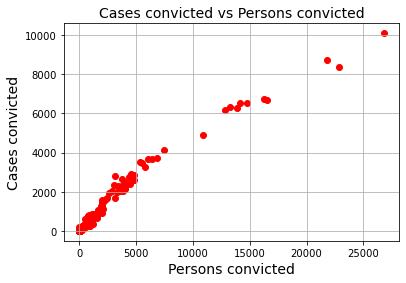

In [87]:
plt.scatter(df1['Persons_Convicted'], df1['Cases_Convicted'], color='red')
plt.title('Cases convicted vs Persons convicted', fontsize=14)
plt.xlabel('Persons convicted', fontsize=14)
plt.ylabel('Cases convicted', fontsize=14)
plt.grid(True)
plt.show()

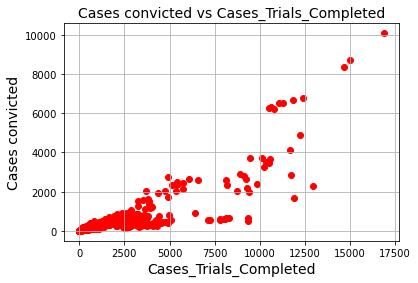

In [88]:
#Check for linearity between dependent variable (cases_convicted) and independent var (Cases_Trials_Completed)
plt.scatter(df1['Cases_Trials_Completed'], df1['Cases_Convicted'], color='red')
plt.title('Cases convicted vs Cases_Trials_Completed', fontsize=14)
plt.xlabel('Cases_Trials_Completed', fontsize=14)
plt.ylabel('Cases convicted', fontsize=14)
plt.grid(True)
plt.show()

In [89]:
ex = ['Persons_Convicted', 'Cases_Trials_Completed']
df_ar=df2
df_ar.set_index("Year", drop=False, inplace=True)


df_ar.Year = pd.to_datetime(df_ar.Year, format="%Y")

from pmdarima import auto_arima
df_train = df_ar[df_ar.Year < '2008']
df_valid = df_ar[df_ar.Year >= '2008']

model = auto_arima(df_train["Cases_Convicted"], exogenous=df_train[ex], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train["Cases_Convicted"], exogenous=df_train[ex])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[ex])


C:\Users\tanvi\AppData\Local\Temp\ipykernel_18200\4254237980.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=90.694, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90.814, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88.538, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.695, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=92.669, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=89.084, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.265 seconds


c:\Users\tanvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Since we were training on only 10 rows of data (crimes grouped year-wise from 2001 to 2011), there was not enough data to train the ARIMA model properly. Hence we decided not to go ahead with it.

### Creating Train and Test Splits Along with Label Encoding

In [90]:
dfnew = df[["Area_Name","Year","Sub_Group_Name","Cases_Reported", "Cases_Convicted"]]

In [91]:
dfnew

,Area_Name,Year,Sub_Group_Name,Cases_Reported,Cases_Convicted
0,Andaman & Nicobar Islands,2001,01. Rape,3,0
1,Andhra Pradesh,2001,01. Rape,871,197
2,Arunachal Pradesh,2001,01. Rape,33,2
3,Assam,2001,01. Rape,817,101
4,Bihar,2001,01. Rape,888,155
...,...,...,...,...,...
2445,Tamil Nadu,2010,07. Importation of Girls,0,0
2446,Tripura,2010,07. Importation of Girls,0,0
2447,Uttar Pradesh,2010,07. Importation of Girls,0,0
2448,Uttarakhand,2010,07. Importation of Girls,0,0


In [92]:
#CREATING DUMMY VARIABLES
import pandas as pd
dfn=pd.DataFrame(dfnew)
X = dfn.iloc[:, :].values
print(X)

[['Andaman & Nicobar Islands' 2001 '01. Rape' 3 0]
 ['Andhra Pradesh' 2001 '01. Rape' 871 197]
 ['Arunachal Pradesh' 2001 '01. Rape' 33 2]
 ...
 ['Uttar Pradesh' 2010 '07. Importation of Girls' 0 0]
 ['Uttarakhand' 2010 '07. Importation of Girls' 0 0]
 ['West Bengal' 2010 '07. Importation of Girls' 8 0]]


In [93]:
Y = dfn.iloc[:, 0].values
print(Y)

['Andaman & Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh' ...
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [94]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dfnew['Area_Name']= label_encoder.fit_transform(dfnew['Area_Name'])
dfnew['Sub_Group_Name']= label_encoder.fit_transform(dfnew['Sub_Group_Name'])
dfnew

C:\Users\tanvi\AppData\Local\Temp\ipykernel_18200\3372006902.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tanvi\AppData\Local\Temp\ipykernel_18200\3372006902.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area_Name,Year,Sub_Group_Name,Cases_Reported,Cases_Convicted
0,0,2001,0,3,0
1,1,2001,0,871,197
2,2,2001,0,33,2
3,3,2001,0,817,101
4,4,2001,0,888,155
...,...,...,...,...,...
2445,30,2010,6,0,0
2446,31,2010,6,0,0
2447,32,2010,6,0,0
2448,33,2010,6,0,0


In [95]:
data=pd.DataFrame(dfnew)
y = data.pop('Cases_Convicted')
X=data
X

,Area_Name,Year,Sub_Group_Name,Cases_Reported
0,0,2001,0,3
1,1,2001,0,871
2,2,2001,0,33
3,3,2001,0,817
4,4,2001,0,888
...,...,...,...,...
2445,30,2010,6,0
2446,31,2010,6,0
2447,32,2010,6,0
2448,33,2010,6,0


In [96]:
seed = 50  # so that the result is reproducible
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state = seed)

## 2. KNN

In [97]:
#KNN REGRESSION
# Instance and fit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
print(score_knn)

# Predictions
preds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,'Prediction': preds, 'Error': y_test - preds})
# View

mse_knn = mean_squared_error(y_test,preds)
print(mse_knn**0.5)

0.08932580009062074
214.50140763536032


In [98]:
mx=df["Cases_Convicted"].max()
#print(mx)
mn=df['Cases_Convicted'].min()
#print(mn)
normalised_rmse=(mse_knn**0.5)/(mx-mn)
print("Normalised RMSE for KNN : ",normalised_rmse)

Normalised RMSE for KNN :  0.07093300517042339


## 3.LASSO REGRESSION

In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 91.474 (10.414)


In [100]:
model = Lasso(alpha=1.0)
# fit model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# summarize prediction
#print('Predicted: %.3f' % y_pred[0])
lasso_mse = mean_squared_error(y_test,y_pred)
print("RMSE: ",lasso_mse**0.5)

RMSE:  201.6120393690843


In [101]:
mx=df["Cases_Convicted"].max()
mn=df['Cases_Convicted'].min()
normalised_rmse=(lasso_mse**0.5)/(mx-mn)
print("Normalised RMSE for Lasso regression : ",normalised_rmse)

Normalised RMSE for Lasso regression :  0.06667064793951201


## 4. MLR

In [102]:
regr = linear_model.LinearRegression()
model = regr.fit(X_train,y_train)
r_sq = model.score(X_train, y_train)

y_pred = model.predict(X_test)

mlr_mse = mean_squared_error(y_test,y_pred)
print("RMSE: ",mlr_mse**0.5)
#summary=model.summary()
#print(y_pred)
print(r_sq)

RMSE:  201.60717047158843
0.43301884756356357


In [103]:
mx=df["Cases_Convicted"].max()
mn=df['Cases_Convicted'].min()
normalised_rmse=(mlr_mse**0.5)/(mx-mn)
print("Normalized rmse for MLR: ",normalised_rmse)

Normalized rmse for MLR:  0.06666903785436125


## 5. Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150, #150    
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')

In [105]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=150, n_jobs=-1,
                       oob_score=True, random_state=50)

In [106]:
y_pred = rf_classifier.predict(X_test)

In [107]:
train_pred=rf_classifier.predict(X_train)

In [108]:
mse_test=mean_squared_error(train_pred,y_train)
print("RMSE of train: ",mse_test**0.5)
mse = mean_squared_error(y_test,y_pred)
print("RMSE of test: ",mse**0.5)

RMSE of train:  251.15839560432713
RMSE of test:  167.98438945938048


In [109]:
mx=df["Cases_Convicted"].max()
mn=df['Cases_Convicted'].min()
normalised_rmse=(mse**0.5)/(mx-mn)
print(normalised_rmse)

0.055550393339742224
